<a href="https://colab.research.google.com/github/Mikes017/proyectofinalSiafi/blob/main/proyectofinal3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Path to dataset files: /root/.cache/kagglehub/datasets/asaniczka/video-game-sales-2024/versions/1


<ipython-input-11-d72e73721b65>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Popularity'] = df['total_sales'].apply(classify_sales)



Exactitud del modelo base: 0.9882352941176471
Reporte de clasificación del modelo base:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         8

    accuracy                           0.99        85
   macro avg       0.99      0.98      0.99        85
weighted avg       0.99      0.99      0.99        85



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
101 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util


Mejores parámetros encontrados: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}

Exactitud del modelo optimizado: 0.9882352941176471
Reporte de clasificación del modelo optimizado:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         8

    accuracy                           0.99        85
   macro avg       0.99      0.98      0.99        85
weighted avg       0.99      0.99      0.99        85



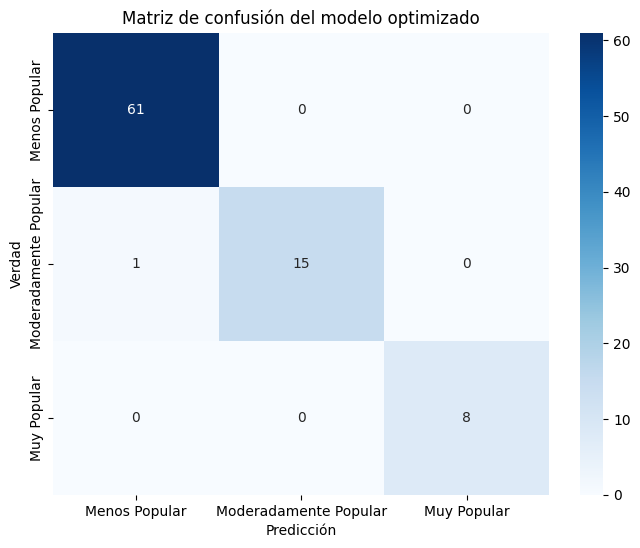

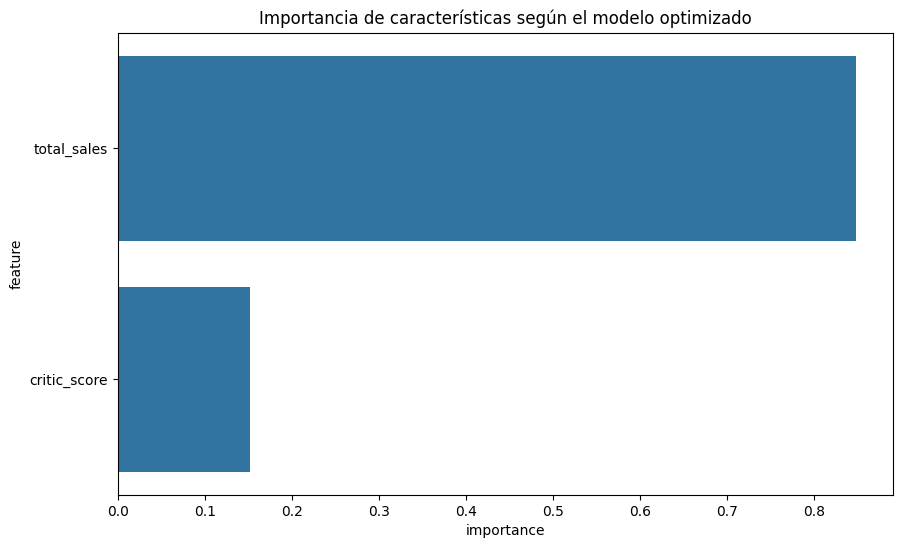

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Importando el DataSet
path = kagglehub.dataset_download("asaniczka/video-game-sales-2024")


# Cargar el archivo CSV
df = pd.read_csv(f"{path}/vgchartz-2024.csv")

# Limpieza de datos
df.dropna(inplace=True)  # Eliminar filas con valores nulos

# Seleccionando las columnas relevantes
df = df[['critic_score', 'total_sales']]

# Esta funcion serivra para crear la categoria "Popularity" la cual sera el objetivo Y que tendra que predecir el modelo
def classify_sales(sales):
    if sales > 5:
        return 2  # Muy Popular
    elif sales > 1:
        return 1  # Moderadamente Popular
    else:
        return 0  # Menos Popular

df['Popularity'] = df['total_sales'].apply(classify_sales)

# Separar características (X) y variable objetivo (y)
X = df[['critic_score', 'total_sales']]
y = df['Popularity']

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# Entrenar el modelo base de Random Forest
modelito = RandomForestClassifier(random_state=666)
modelito.fit(X_train, y_train)

# Evaluar el modelo base
y_pred = modelito.predict(X_test)
print("\nExactitud del modelo base:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación del modelo base:\n", classification_report(y_test, y_pred))

# Definir el grid de parámetros para optimización
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Entrenar con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print("\nMejores parámetros encontrados:", grid_search.best_params_)

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nExactitud del modelo optimizado:", accuracy_score(y_test, y_pred_best))
print("Reporte de clasificación del modelo optimizado:\n", classification_report(y_test, y_pred_best))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Menos Popular', 'Moderadamente Popular', 'Muy Popular'],
            yticklabels=['Menos Popular', 'Moderadamente Popular', 'Muy Popular'])
plt.title("Matriz de confusión del modelo optimizado")
plt.xlabel("Predicción")
plt.ylabel("Verdad")
plt.show()

# Importancia de características
importances = best_model.feature_importances_
feature_names = X.columns

# Crear DataFrame para visualizar importancia
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Graficar importancias
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importances_df)
plt.title("Importancia de características según el modelo optimizado")
plt.show()

#En este caso el modelo no mejoro pero ya era bastante bueno
